In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import zscore

df = pd.read_csv("/content/2025-VeloCityX-Expanded-Fan-Engagement-Data.csv")

df.head()

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8


In [2]:
# the number of rows and columns
df.shape

(100, 7)

In [3]:
# drop User ID because it is not necessary in the analysis
df.drop('User ID', axis=1, inplace=True)

df.head()

,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,5,80,3,10,120,20
1,8,60,1,8,100,35
2,3,90,0,6,90,5
3,7,70,2,15,140,40
4,2,50,5,3,60,8


In [4]:
# summary statistics
df.describe()

,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.790000,74.990000,2.670000,8.680000,129.350000,25.050000
std,2.825908,14.033506,2.064882,6.340315,38.634358,14.163101
min,1.000000,50.000000,0.000000,0.000000,60.000000,0.000000
25%,3.000000,62.000000,1.000000,2.000000,98.000000,11.000000
50%,6.000000,77.000000,2.000000,8.000000,124.500000,25.500000
75%,8.000000,86.500000,5.000000,15.000000,160.000000,35.000000
max,10.000000,98.000000,6.000000,19.000000,199.000000,49.000000


In [5]:
# check the number of missing values in each column
df.isnull().sum()

,0
Fan Challenges Completed,0
Predictive Accuracy (%),0
Virtual Merchandise Purchases,0
Sponsorship Interactions (Ad Clicks),0
Time on Live 360 (mins),0
Real-Time Chat Activity (Messages Sent),0


In [6]:
# check data types
df.dtypes

,0
Fan Challenges Completed,int64
Predictive Accuracy (%),int64
Virtual Merchandise Purchases,int64
Sponsorship Interactions (Ad Clicks),int64
Time on Live 360 (mins),int64
Real-Time Chat Activity (Messages Sent),int64


In [7]:
df_standardized = df.apply(zscore)

df_standardized.head()

,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,-0.280964,0.358801,0.160621,0.209240,-0.243232,-0.358357
1,0.785989,-1.073539,-0.812837,-0.107790,-0.763514,0.706069
2,-0.992267,1.074971,-1.299566,-0.424821,-1.023655,-1.422782
3,0.430338,-0.357369,-0.326108,1.001818,0.277050,1.060877
4,-1.347918,-1.789709,1.134078,-0.900368,-1.804077,-1.209897


In [8]:
df_standardized.to_csv("2025-VeloCityX-Expanded-Fan-Engagement-Data-Cleaned.csv", index=False)  # Save the file without the index

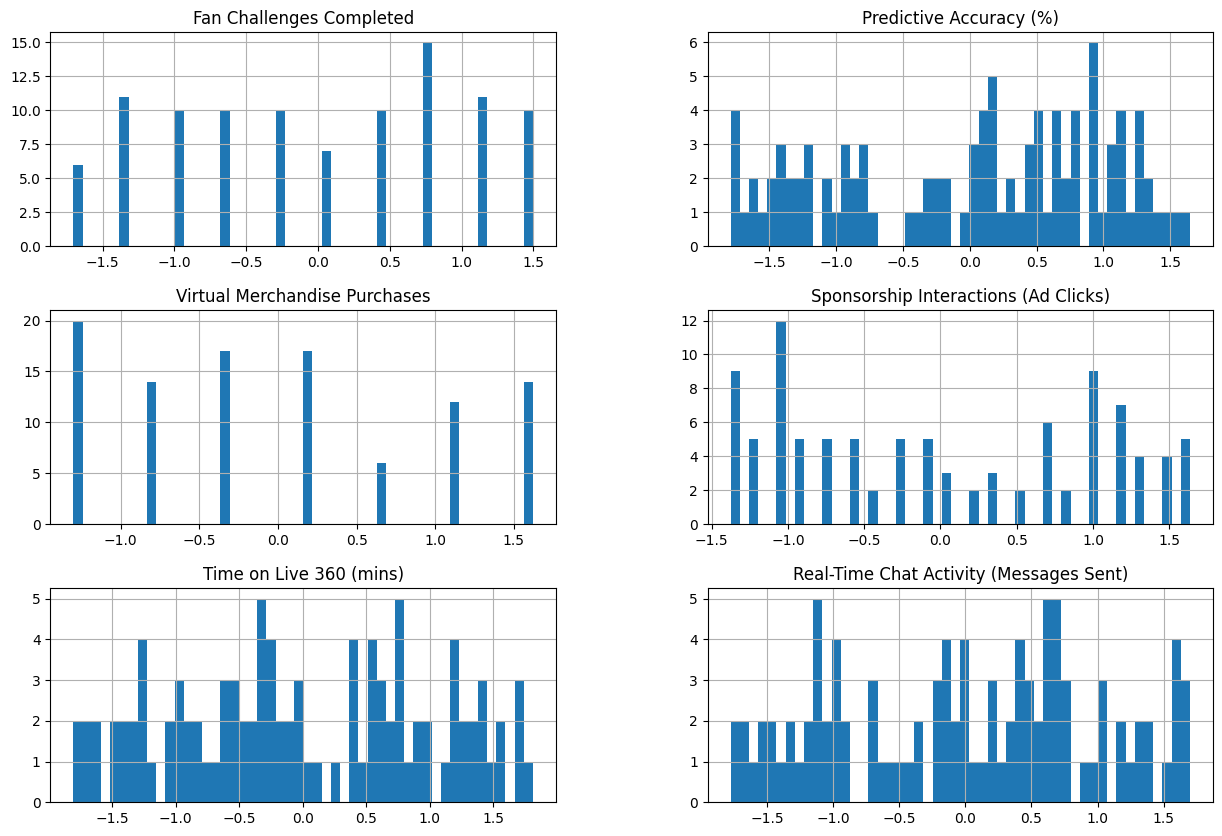

In [9]:
# visualize the distribution of each column
df_standardized.hist(bins=50, figsize=(15,10))
plt.show()

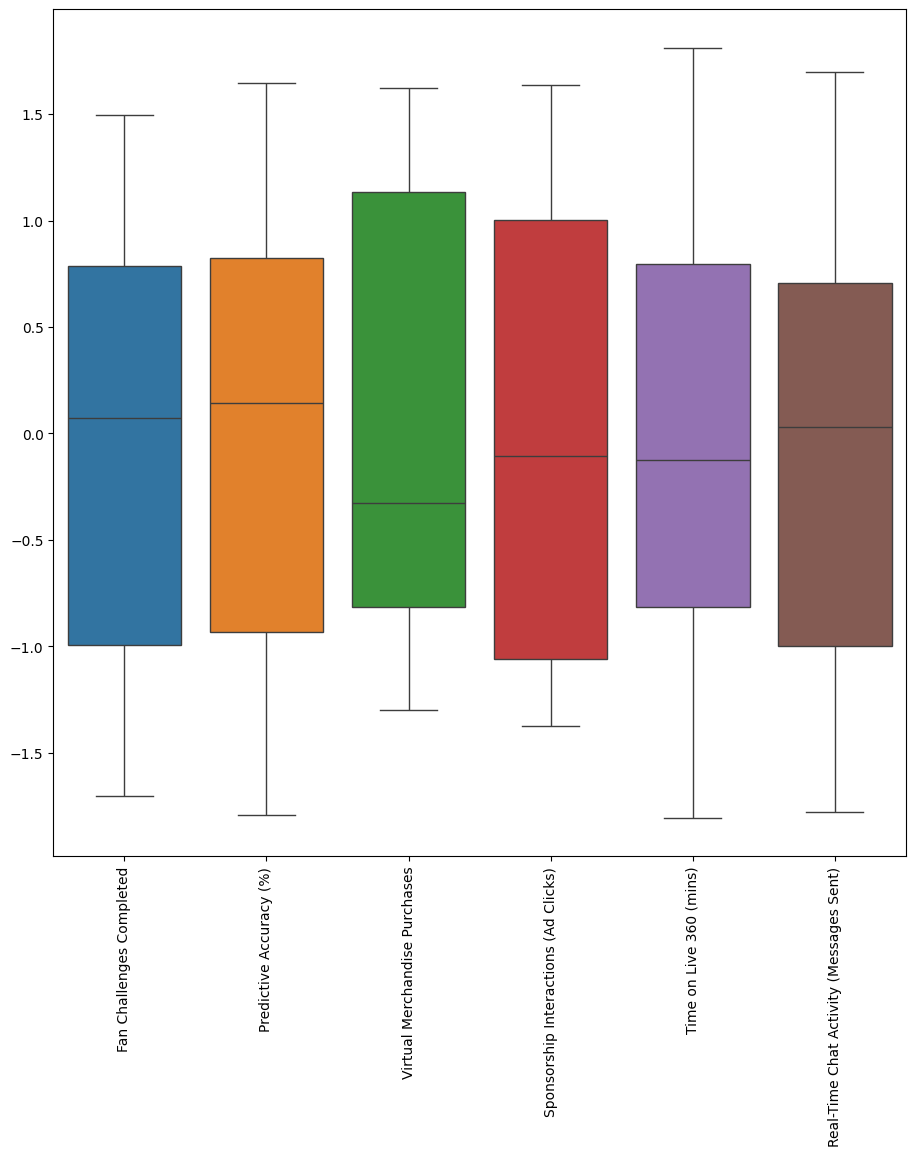

In [10]:
# visualize outliers
plt.figure(figsize=(11, 11))
sns.boxplot(data=df_standardized)
plt.xticks(rotation=90)
plt.show()

In [11]:
# correlation matrix to identify relationships between features
corr_matrix = df_standardized.corr()
corr_matrix

,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
Fan Challenges Completed,1.000000,-0.105757,0.159378,-0.065239,0.002900,0.008089
Predictive Accuracy (%),-0.105757,1.000000,0.022194,0.056612,0.125427,0.024295
Virtual Merchandise Purchases,0.159378,0.022194,1.000000,0.070550,-0.007527,-0.044676
Sponsorship Interactions (Ad Clicks),-0.065239,0.056612,0.070550,1.000000,-0.073929,0.191292
Time on Live 360 (mins),0.002900,0.125427,-0.007527,-0.073929,1.000000,0.050714
Real-Time Chat Activity (Messages Sent),0.008089,0.024295,-0.044676,0.191292,0.050714,1.000000


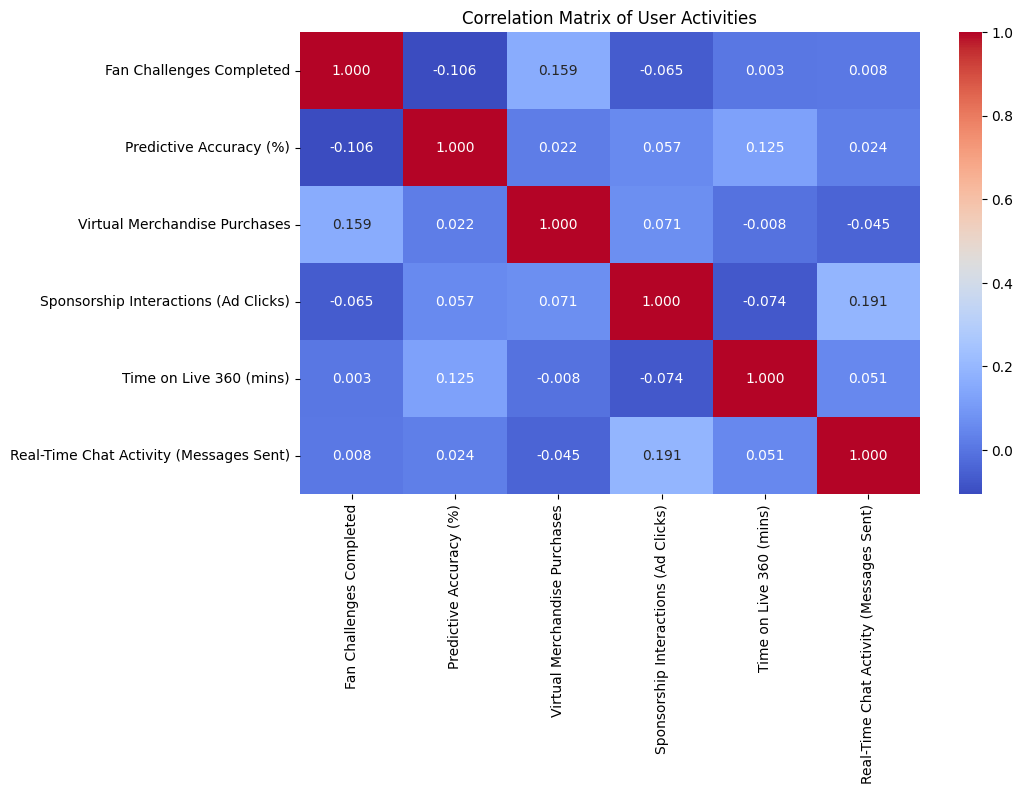

In [12]:
# visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Correlation Matrix of User Activities')
plt.show()

<Axes: >

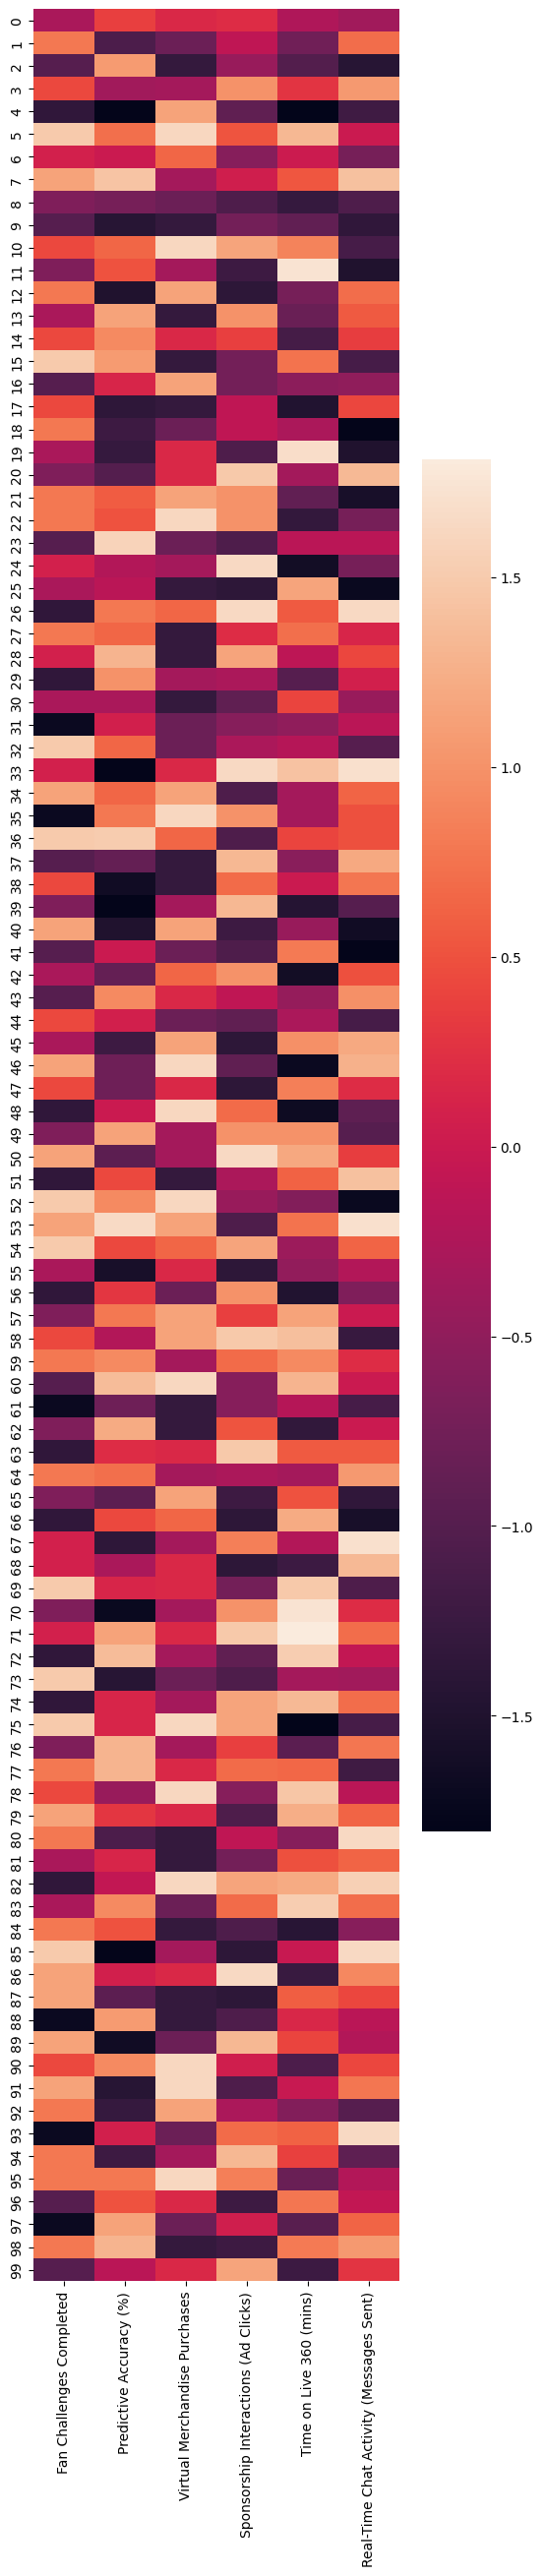

In [13]:
# use the seaborn heatmap() function to make a heatmap of df_standardized (100 rows and 6 columns)
plt.figure(figsize = (6,30))
sns.heatmap(df_standardized)

In [14]:
df_standardized.corr()['Virtual Merchandise Purchases'].drop('Virtual Merchandise Purchases',axis = 0)

,Virtual Merchandise Purchases
Fan Challenges Completed,0.159378
Predictive Accuracy (%),0.022194
Sponsorship Interactions (Ad Clicks),0.070550
Time on Live 360 (mins),-0.007527
Real-Time Chat Activity (Messages Sent),-0.044676


In [15]:
df_standardized.corr()['Sponsorship Interactions (Ad Clicks)'].drop('Sponsorship Interactions (Ad Clicks)',axis = 0)

,Sponsorship Interactions (Ad Clicks)
Fan Challenges Completed,-0.065239
Predictive Accuracy (%),0.056612
Virtual Merchandise Purchases,0.070550
Time on Live 360 (mins),-0.073929
Real-Time Chat Activity (Messages Sent),0.191292


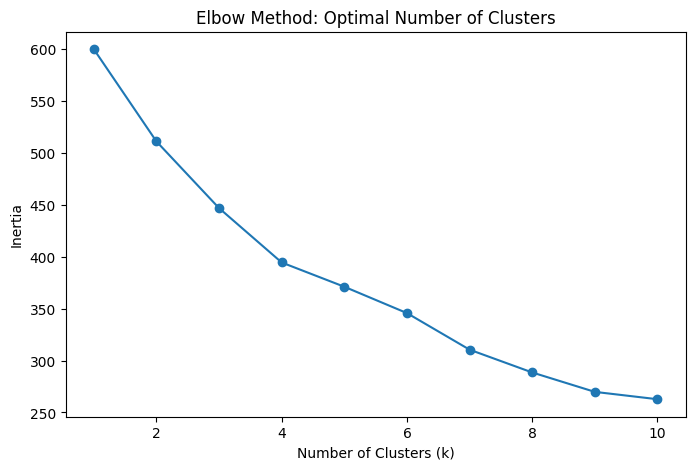

In [16]:
inertia = []  # Store inertia values for each k

# Try different values of k (from 1 to 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_standardized)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method: Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [17]:
from sklearn.cluster import KMeans

# Apply K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df_standardized['Cluster'] = kmeans.fit_predict(df_standardized)

# Display the first few rows with cluster assignments
df_standardized.head()

,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent),Cluster
0,-0.280964,0.358801,0.160621,0.209240,-0.243232,-0.358357,1
1,0.785989,-1.073539,-0.812837,-0.107790,-0.763514,0.706069,3
2,-0.992267,1.074971,-1.299566,-0.424821,-1.023655,-1.422782,2
3,0.430338,-0.357369,-0.326108,1.001818,0.277050,1.060877,0
4,-1.347918,-1.789709,1.134078,-0.900368,-1.804077,-1.209897,3


In [18]:
# Group by cluster and calculate the mean of each feature
df_standardized.groupby('Cluster').mean()

,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
Cluster,,,,,,
0,-0.750932,0.056987,-0.187043,0.928221,-0.269246,0.635107
1,0.717154,0.596755,0.615948,0.280828,0.304743,-0.175230
2,-0.604284,0.192780,-0.657969,-0.965215,0.260496,-0.774450
3,0.636241,-1.280851,0.032534,-0.708481,-0.402055,0.246685


**Cluster 0**: This group exhibits **high engagement in chat activities** and **strong interaction with sponsorships**, but shows **low participation in fan challenges**. To increase their involvement in challenges, consider offering **sponsored promotions and exclusive incentives** for completing challenges.

**Cluster 1**: Users in this cluster are **highly engaged in fan challenges** and are also **frequent merchandise buyers**. However, their **chat activity is relatively low**. A good strategy would be to **offer exclusive rewards** to merchandise buyers and **encourage chat participation** through special in-app events or community-driven activities.

**Cluster 2**:	This group shows **low overall engagement**, particularly in **ads and chat activities**. To re-engage these users, targeted campaigns could focus on **incentivizing participation in fan challenges and boosting interactions with sponsorships** through personalized promotions.

**Cluster 3**:	These users exhibit **moderate participation in fan challenges**, but their **prediction accuracy is quite poor**. To enhance their performance and keep them motivated, we could provide **training, tips, or hints** for improving predictions, coupled with **better rewards for accurate predictions** to foster continued engagement.

### **Which users are most likely to purchase virtual merchandise? How do user activities during race events correlate with their merchandise purchases and sponsorship interaction?**

**High participation in fan challenges** correlates with **higher virtual merchandise purchases**. These users are the most likely to purchase virtual merchandise, as they actively engage in gamified challenges and perform well, which suggests that they respond to reward-based incentives.

There is a weak positive correlation between **sponsorship interactions (ad clicks)** and **real-time chat activity**. Although the correlation is not very strong, it still suggests that users actively engaging in chat are also more likely to engage with sponsored content. This insight can help us target chat-active users with ad placements or incentivize ad engagement through social activities.

### **Propose a new fan challenge based on your analysis, with predicted outcomes for engagement and monetization.**

Challenge: invite users to predict the exact lap time of an autonomous vehicle during race segments. Points are awarded based on how close the prediction is to the actual time, with bonus points for consecutive accurate predictions.

**1. Engagement Increase:**

Motivates users in Cluster 3, who participate in challenges but struggle with accuracy, by offering repeated chances to improve and earn rewards.

**2. Boost in Merchandise Sales:**

Users in Cluster 1, who actively engage in challenges and purchase merchandise, can unlock discounts on virtual merchandise as a reward for good performance.

**3. Improved Sponsorship Engagement:**

The challenge can feature sponsored race segments with brands offering exclusive prizes for top-performing participants. This aligns with Cluster 0 users, who are highly engaged with sponsorships.

**4. Exclusive Merchandise Offers:**
  
Merchandise bundles with discounts for high-performing players.

**5. Sponsored Ads within Challenges:**

Increase ad interaction by placing sponsorship content between predictions.
